In [33]:
from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('chesterish')

In [34]:
import pandas as pd

In [35]:
import numpy as np

### Part A

In [36]:
df = pd.read_csv('ECarSalesByCountryAndYear.csv',index_col="Country")
df

,Sales2021,Sales2020,Sales2019,Sales2018,Sales2017
Country,,,,,
Canada,87700,51376,50960,44150,18746
China,3334000,1246000,1204000,1016002,579000
France,315978,194881,69466,53745,42799
Germany,681410,394632,108839,67504,54492
Japan,44296,29000,43867,52013,54100
Netherlands,95464,89362,67520,29187,11085
Norway,167949,113588,88443,86290,71737
Sweden,138033,96054,41784,29909,19793
United Kingdom,305281,175082,72584,59911,49182


In [37]:
df["Growth"] = (df[df.columns[0]]/df[df.columns[1]])-1
df

,Sales2021,Sales2020,Sales2019,Sales2018,Sales2017,Growth
Country,,,,,,
Canada,87700,51376,50960,44150,18746,0.707023
China,3334000,1246000,1204000,1016002,579000,1.675762
France,315978,194881,69466,53745,42799,0.621389
Germany,681410,394632,108839,67504,54492,0.726697
Japan,44296,29000,43867,52013,54100,0.527448
Netherlands,95464,89362,67520,29187,11085,0.068284
Norway,167949,113588,88443,86290,71737,0.478580
Sweden,138033,96054,41784,29909,19793,0.437035
United Kingdom,305281,175082,72584,59911,49182,0.743646


In [38]:
df.style.format({
    'Growth': '{:,.1%}'.format
})
    

,Sales2021,Sales2020,Sales2019,Sales2018,Sales2017,Growth
Country,,,,,,
Canada,87700,51376,50960,44150,18746,70.7%
China,3334000,1246000,1204000,1016002,579000,167.6%
France,315978,194881,69466,53745,42799,62.1%
Germany,681410,394632,108839,67504,54492,72.7%
Japan,44296,29000,43867,52013,54100,52.7%
Netherlands,95464,89362,67520,29187,11085,6.8%
Norway,167949,113588,88443,86290,71737,47.9%
Sweden,138033,96054,41784,29909,19793,43.7%
United Kingdom,305281,175082,72584,59911,49182,74.4%


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, Canada to United States
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sales2021  10 non-null     int64  
 1   Sales2020  10 non-null     int64  
 2   Sales2019  10 non-null     int64  
 3   Sales2018  10 non-null     int64  
 4   Sales2017  10 non-null     int64  
 5   Growth     10 non-null     float64
dtypes: float64(1), int64(5)
memory usage: 860.0+ bytes


## Part B


In [40]:
df.sort_values("Growth", ascending = False)

,Sales2021,Sales2020,Sales2019,Sales2018,Sales2017,Growth
Country,,,,,,
China,3334000,1246000,1204000,1016002,579000,1.675762
United States,607567,297939,329528,361307,199818,1.039233
United Kingdom,305281,175082,72584,59911,49182,0.743646
Germany,681410,394632,108839,67504,54492,0.726697
Canada,87700,51376,50960,44150,18746,0.707023
France,315978,194881,69466,53745,42799,0.621389
Japan,44296,29000,43867,52013,54100,0.527448
Norway,167949,113588,88443,86290,71737,0.478580
Sweden,138033,96054,41784,29909,19793,0.437035


In [41]:
dfRecent = df[['Sales2021','Sales2020']]
dfRecent


,Sales2021,Sales2020
Country,,
Canada,87700,51376
China,3334000,1246000
France,315978,194881
Germany,681410,394632
Japan,44296,29000
Netherlands,95464,89362
Norway,167949,113588
Sweden,138033,96054
United Kingdom,305281,175082


In [42]:
dfRecent.loc[["United States","Canada"]]

,Sales2021,Sales2020
Country,,
United States,607567,297939
Canada,87700,51376


In [43]:
dfRecent.sum()

Sales2021    5777678
Sales2020    2687914
dtype: int64

## Part C

In [44]:
dfCountries = pd.read_csv('countries.csv', index_col = "Country")
dfCountries

,Continent
Country,
Canada,AMERICA
China,ASIA
France,EUROPE
Germany,EUROPE
Japan,ASIA
Netherlands,EUROPE
Norway,EUROPE
Sweden,EUROPE
United Kingdom,EUROPE


In [45]:
df2 = df.join(dfCountries)
df2

,Sales2021,Sales2020,Sales2019,Sales2018,Sales2017,Growth,Continent
Country,,,,,,,
Canada,87700,51376,50960,44150,18746,0.707023,AMERICA
China,3334000,1246000,1204000,1016002,579000,1.675762,ASIA
France,315978,194881,69466,53745,42799,0.621389,EUROPE
Germany,681410,394632,108839,67504,54492,0.726697,EUROPE
Japan,44296,29000,43867,52013,54100,0.527448,ASIA
Netherlands,95464,89362,67520,29187,11085,0.068284,EUROPE
Norway,167949,113588,88443,86290,71737,0.478580,EUROPE
Sweden,138033,96054,41784,29909,19793,0.437035,EUROPE
United Kingdom,305281,175082,72584,59911,49182,0.743646,EUROPE


In [46]:
df2.groupby('Continent').sum()

,Sales2021,Sales2020,Sales2019,Sales2018,Sales2017,Growth
Continent,,,,,,
AMERICA,695267,349315,380488,405457,218564,1.746256
ASIA,3378296,1275000,1247867,1068015,633100,2.203211
EUROPE,1704115,1063599,448636,326546,249088,3.075633


<AxesSubplot:ylabel='Country'>

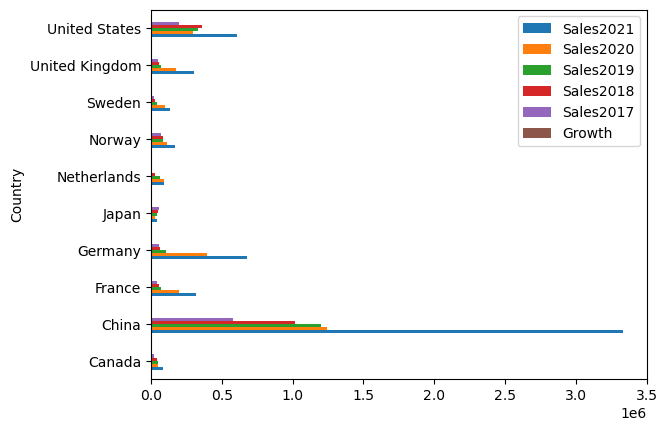

In [47]:
%matplotlib inline
df2.plot(kind='barh')
#df.groupby('Country')["Sales2021"].sum().sort_values()

In [13]:
dfRecent

,Sales2021,Sales2020,Total Sales
Country,,,
Canada,87700,51376,139076
China,3334000,1246000,4580000
France,315978,194881,510859
Germany,681410,394632,1076042
Japan,44296,29000,73296
Netherlands,95464,89362,184826
Norway,167949,113588,281537
Sweden,138033,96054,234087
United Kingdom,305281,175082,480363


<AxesSubplot:ylabel='Country'>

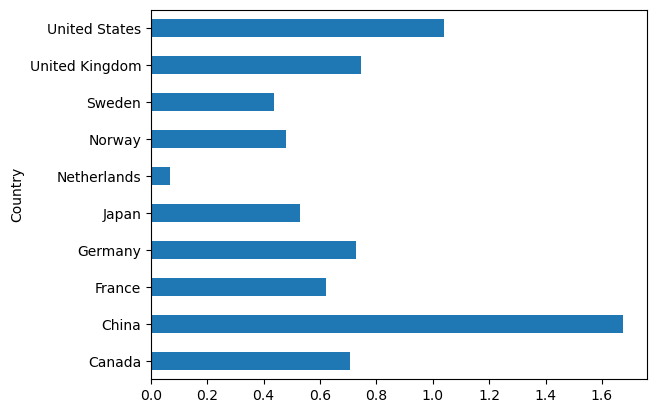

In [14]:
%matplotlib inline
df["Growth"].plot(kind = "barh")
